### ガウス過程

・確率モデリング手法のひとつ、入力 $ \boldsymbol{x} $ 、出力 $ y $ があった時、$ y = f(\boldsymbol{x}) $ となる 回帰関数 $ f(\boldsymbol{x}) $ を求める手法。非線形性を考慮できる。

・ガウス過程は機械学習における教師あり学習の回帰分析に応用される。平均値関数と共分散関数を既知とし与えられたデータがそのガウス過程に従っていると仮定すると未知の観測値の平均と分散がわかる。（Wiki）

・N次元の入力$ \boldsymbol{x_N} $ に対し、次式で定義される関数$ y = f(\boldsymbol{x_N}) $ を考える。

$$ y = f(\boldsymbol{x_N}) = \boldsymbol{w･φ(x_N)}$$

ここで $ \boldsymbol{w} $ と $ \boldsymbol{φ} $ はM次元ベクトルであり、$ \boldsymbol{φ(x_N)} $ は入力 $ \boldsymbol{x_N} $ をM次元特徴空間に射影する関数である。つまり、

$$ y = w_1･φ_1(x_N) + w_2･φ_2(x_N) + ・・・ + w_M･φ_M(x_N)$$

となる。$ \boldsymbol{φ} $ にはガウシアン（RBF）カーネル（無限次元の特徴空間）や指数カーネルがある。ここで、パラメータ $ \boldsymbol{w} $ に対し次の事前分布を仮定する。

$$ p( \boldsymbol{w}|α) =  \boldsymbol{N}(0, α^{-1}I_M)$$

すると、$ y = \boldsymbol{w･φ(x_N)} $ もガウス分布に従う。

$$ p(y) =  \boldsymbol{N}(0, α^{-1}\boldsymbol{φφ^{T}})$$

$ α^{-1}\boldsymbol{φφ^{T}} = k(\boldsymbol{x, x'})$ はカーネルと呼ばれる量であり、これだけで分布が定まる。$ k(\boldsymbol{x, x'})$は$ \boldsymbol{x}$ と $ \boldsymbol{x'} $ の距離を表し、入力$ \boldsymbol{x}$が近い→ $ y $が近い。

・どんな入力$ \boldsymbol{w} $ についても、対応する出力$ \boldsymbol{y} $ がガウス分布に従うとき、$ p(y) $はガウス過程に従う　と言う。つまり、ガウス過程＝無限次元のガウス分布。ただし実際にはデータのあるところだけの有限次元。

・カーネルトリック（SVMでの考え方と同じ、内積結果が同じとなるように特徴空間を拡張する）が使われている。

・DNNはガウス過程と等価である。

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
np.random.seed(123)
 
THETA = 0.5 
SIGMA = 0.1 
 
def kernel_0(x0, x1):
    return np.exp(-THETA * np.abs(x0 - x1))
 
def kernel_1(x0, x1):
    dx = x0 - x1
    return np.exp(-dx**2 / 2 / SIGMA / SIGMA)
 
def make_kernel(xs, kernel):
    xs = xs.reshape(-1, 1)
    return kernel(xs, xs.T)

Text(0, 0.5, '$y$')

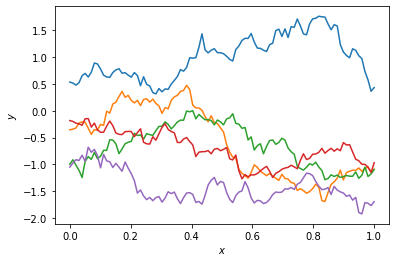

In [3]:
# [0,1]の間に等間隔にN個のxを作る。
N = 100 
xs = np.linspace(0, 1, N)

# カーネルを作る。これが共分散行列になる。
k = make_kernel(xs, kernel_0)

# 平均値は0
mean = np.zeros(len(xs))

# 多次元ガウス分布からyを5つ生成。
ys = np.random.multivariate_normal(mean, k, 5)

for y in ys: 
    plt.plot(xs, y)
plt.xlabel("$x$")
plt.ylabel("$y$")

Text(0, 0.5, '$y$')

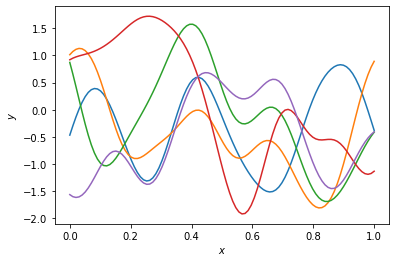

In [4]:
# カーネルを作る。これが共分散行列になる。
k = make_kernel(xs, kernel_１)

# 平均値は0
mean = np.zeros(len(xs))

# 多次元ガウス分布からyを5つ生成。
ys = np.random.multivariate_normal(mean, k, 5)

for y in ys: 
    plt.plot(xs, y)
plt.xlabel("$x$")
plt.ylabel("$y$")

### Ref.

https://tips-memo.com/gaussian-process

https://qiita.com/GushiSnow/items/f032806cfa8cec046318

https://orizuru.io/blog/machine-learning/gaussian-process/

https://www.ism.ac.jp/~daichi/lectures/H26-GaussianProcess/gp-lecture2-daichi.pdf